# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)<br>
   ● Mention which model gives the best result in your file and justify your answer.

In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")

## 1. Read the dataset to the python environment.

In [2]:
#Reading the dataset to the python environment
data=pd.read_excel('iris Case Study #07.xls')
#displaying   the dataset
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  
    
- __The Iris Dataset contains four features (length and width of sepals and petals) of 150 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor)__.  <br> 
- <strong>There are 5 columns/features/details<strong>   <br>  
- 4 of the features are numerical and 1 is object data type. .<br> 
- Also there are some empty/NaN values present in the dataset in the columns of "SL","SW","PL". <br>  
    

    
</div>

In [4]:
data.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


**Handling missing values**

In [5]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
##the percentage of missing values for each variable
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = round(data.isnull().mean()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data

,Total,%
SL,7,4.67
SW,6,4.00
PL,6,4.00
PW,0,0.00
Classification,0,0.00


- 'SL' feature has 7 missing values. <br> 
- 'SW' feature has 6 missing values. <br> 
- 'PL’ feature  has 6 <br> 

**Filling missing values**

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

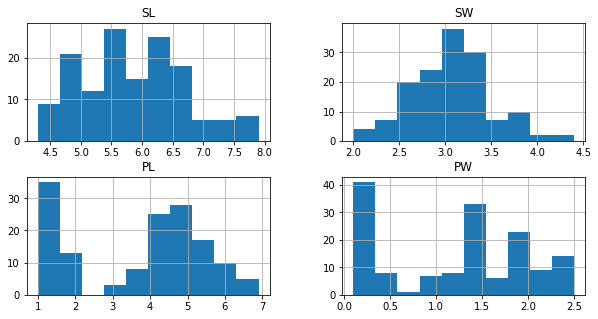

In [7]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,5))
plt.show()

In [8]:
#df_num = data[['SL','SW','PL','PW']]

#for i in df_num.columns:
   # sns.distplot(df_num[i])
   # plt.title(i)
   # plt.show()

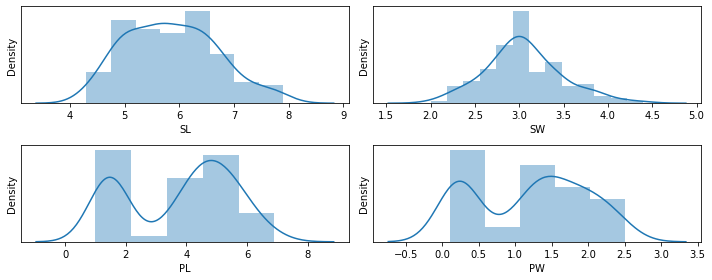

In [9]:
#kde plot of features
f, axes = plt.subplots(2, 2, figsize=(10, 4))
sns.distplot(data['SL'],  ax=axes[0, 0])
sns.distplot(data['SW'],  ax=axes[0, 1])
sns.distplot(data['PL'],  ax=axes[1, 0])
sns.distplot(data['PW'],  ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

**all features are skewed, So filling with median values**

In [10]:
# fill NaN with median 
data['SL'].fillna(data['SL'].median(), inplace=True)
data['SW'].fillna(data['SW'].median(), inplace=True)
data['PL'].fillna(data['PL'].median(), inplace=True)

In [11]:
#checking for null values
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**No Null Values**

## 2. Do necessary pre-processing steps.

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


**Handling outliers**

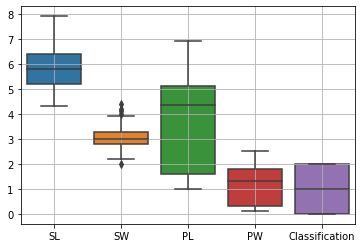

In [87]:
sns.boxplot(data=data)
plt.grid()
plt.show()

There are some ouliers in SW


In [92]:
#defining quantiles
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of outliers is:', len(outlier))
print("outliers",(outlier))

Q1 2.8
Q2 3.0
Q3 3.25
IQR 0.4500000000000002
Lower limit 2.1249999999999996
Upper Limit 3.9250000000000003
The count of outliers is: 5
outliers [2.0, 4.0, 4.1, 4.2, 4.4]


few outliers and they are  close to upper and lower limits

**Label encoding on classification feature**

In [14]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [16]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [17]:
# feature columns
x=data.drop(['Classification'],axis=1)
#  target column 'Classification''
#y=pd.DataFrame(data['Classification'])
y=data['Classification']

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

**Feature Engineering**

In [19]:
#x['mean']=x[['SL', 'SW', 'PL', 'PW']].mean(axis=1)
#x['sum']=x[['SL', 'SW', 'PL', 'PW']].sum(axis=1)
#x['skew']=x[['SL', 'SW', 'PL', 'PW']].skew(axis=1)
#x['kurt']=x[['SL', 'SW', 'PL', 'PW']].kurt(axis=1)


In [20]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


**Splitting the Data**

In [21]:
#scalar = preprocessing.StandardScaler()
#x = scalar.fit_transform(x)

In [22]:
# splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.25)

In [23]:
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (112, 4)
 shape of y train (112,)
 shape of x test (38, 4)
 shape of y test (38,)


In [24]:


#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
#x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

#x.describe()

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

- RandomForestClassifier
- Gradient Boosting
- Extreme Gradient Boosting
- Logistic regression
- KNN Model
- Decision Tree Model
- SVM Model- <br>
   - linear,<br>
   - polynomial,<br>
   - radial

In [25]:
# Function to check model performances
#from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
#def check_model_metrices(y_test, y_pred):
   # print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    #print('Model Precision = ', precision_score(y_test, y_pred, average='micro'))
    #print('Model Recall = ', recall_score(y_test, y_pred, average='micro'))
    #print('Model F1 Score = ', f1_score(y_test, y_pred, average='micro'))
    #print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

**1.Logistic regression**

In [26]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
precision is:  0.9419191919191919
recall is:  0.9488636363636364
f1_score is:  0.9444515279017383


In [28]:
#y_pred1=logit_model.predict(x_train)
#print("Accuracy of training is: ",accuracy_score(y_train,y_pred1))

In [29]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

In [30]:
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
#10 fold cross validation
scores = cross_val_score(logit_model, x_train, y_train, cv=10)
print(np.mean(scores))

0.9378787878787879


this model is already performing very well with a test score of .94736 and a cross validation score of .9378. This means that the model is predicting the correct class for the flower about 94% of time

In [31]:
predictions = logit_model.predict(x_test)
predictions

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [32]:
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

In [33]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,1,15


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.91      0.91      0.91        11
           2       0.92      1.00      0.96        11

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.95      0.95      0.95        38



**2.k-NN Model**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors =np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

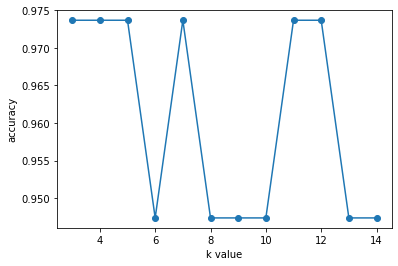

In [36]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

Here highest accuracy is for 3,4,5,7,11,12

In [37]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [38]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
precision is:  0.9722222222222222
recall is:  0.9791666666666666
f1_score is:  0.9747545582047685


In [39]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

In [40]:
#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
scores = cross_val_score(classifier, x_train, y_train, cv=10)
print(np.mean(scores))

0.9287878787878787


In [41]:
predictions = classifier.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

In [42]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,0,11,0
0,0,1,15


**3.Decision Tree Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=dt_model.predict(x_test)

In [45]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
precision is:  0.9393939393939394
recall is:  0.9393939393939394
f1_score is:  0.9393939393939394


In [46]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

In [47]:
scores = cross_val_score(dt_model, x_train, y_train, cv=10)
print(np.mean(scores))


0.9553030303030303


In [48]:
predictions = dt_model.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

In [49]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,10,1,0
1,1,10,0
0,0,0,16


**4.SVM**

**i.Linear**

In [50]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)


SVC(kernel='linear')

In [51]:
y_pred=svm_linear.predict(x_test)

In [52]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
precision is:  0.9722222222222222
recall is:  0.9696969696969697
f1_score is:  0.9696342305037957


In [53]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

In [54]:
scores = cross_val_score(svm_linear, x_train, y_train, cv=10)
print(np.mean(scores))
predictions = svm_linear.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

0.9287878787878789


In [55]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


**ii.polynomial svm**

In [56]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [57]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
precision is:  0.9722222222222222
recall is:  0.9696969696969697
f1_score is:  0.9696342305037957


In [58]:
scores = cross_val_score(svm_poly, x_train, y_train, cv=10)
print(np.mean(scores))
predictions = svm_poly.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

0.9553030303030303


In [59]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


**iii.Radial SVM**

In [60]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [61]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
precision is:  0.9419191919191919
recall is:  0.9488636363636364
f1_score is:  0.9444515279017383


In [62]:
scores = cross_val_score(svm_radial, x_train, y_train, cv=10)
print(np.mean(scores))
predictions = svm_radial.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

0.956060606060606


In [63]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,1,15


**5.Gradient Boosting**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [65]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
precision is:  0.9393939393939394
recall is:  0.9393939393939394
f1_score is:  0.9393939393939394


In [66]:
scores = cross_val_score(gb, x_train, y_train, cv=10)
print(np.mean(scores))
predictions = gb.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

0.946969696969697


In [67]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,10,1,0
1,1,10,0
0,0,0,16


***6.Extreme gradient boosting***

In [68]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

[10:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
precision is:  0.9722222222222222
recall is:  0.9696969696969697
f1_score is:  0.9696342305037957


In [70]:
scores = cross_val_score(xgb, x_train, y_train, cv=10)
print(np.mean(scores))
predictions = xgb.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
#compare_df

[10:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [71]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


**7.Random Forest Model**

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [73]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("precision is: ",precision_score(y_test,y_pred,average='macro'))
print("recall is: ",recall_score(y_test,y_pred,average='macro'))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
precision is:  0.9722222222222222
recall is:  0.9696969696969697
f1_score is:  0.9696342305037957


In [74]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

In [75]:
scores = cross_val_score(rf, x_train, y_train, cv=10)
print(np.mean(scores))
predictions = rf.predict(x_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

0.9477272727272726


,actual,predicted
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
5,2,2
6,0,0
7,2,2
8,2,2
9,0,0


In [76]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


In [77]:
#rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion="entropy")

In [78]:
##rft.fit(x_train,y_train)
#y_pred=rft.predict(x_test)

In [79]:
#print("Accuracy is: ",accuracy_score(y_test,y_pred))
#print("precision is: ",precision_score(y_test,y_pred,average='macro'))
#print("recall is: ",recall_score(y_test,y_pred,average='macro'))
#print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

<div class="alert alert-block alert-info"><b>FInd:</b><br>  
    
- classification model gives the best result to predict iris species is. <br>  
    

    
</div>

In [80]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    49.750599
PL    36.415916
SL     9.011867
SW     4.821617
dtype: float64

- RandomForestClassifier
- Gradient Boosting
- Extreme Gradient Boosting
- Logistic regression
- KNN Model
- Decision Tree Model
- SVM Model- <br>
   - linear,<br>
   - polynomial,<br>
   - radial

In [81]:
x.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


values are in different range

so scaling

**min max scaling scaling**

In [82]:
#min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
#x_test= min_max.fit_transform(x_test)
#x_train= min_max.fit_transform(x_train)
#x_train=pd.DataFrame(x_train)
#x_test=pd.DataFrame(x_test)

In [83]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x_train=scaler.fit_transform(x_train)
#x_test=scaler.fit_transform(x_test)

In [84]:
x_test.describe()

,SL,SW,PL,PW
count,38.000000,38.000000,38.000000,38.000000
mean,5.736842,3.078947,3.584211,1.097368
std,0.839698,0.411430,1.802592,0.782403
min,4.400000,2.300000,1.200000,0.100000
25%,5.025000,2.825000,1.600000,0.225000
50%,5.700000,3.000000,4.325000,1.300000
75%,6.400000,3.275000,4.975000,1.775000
max,7.700000,4.000000,6.700000,2.500000


- RandomForestClassifier
- Gradient Boosting
- Extreme Gradient Boosting
- Logistic regression
- KNN Model
- Decision Tree Model
- SVM Model- <br>
   - linear,<br>
   - polynomial,<br>
   - radial

In [85]:
#making prediction on new data 

#clfr.predict([[3, 5, 4, 2]])